# Series temporales

Para el trabajo con series temporales se recomienda el uso de la biblioteca [darts](https://unit8co.github.io/darts/).

In [10]:
import pandas as pd
from darts.datasets import AirPassengersDataset

dataset = AirPassengersDataset()

<Axes: xlabel='Month'>

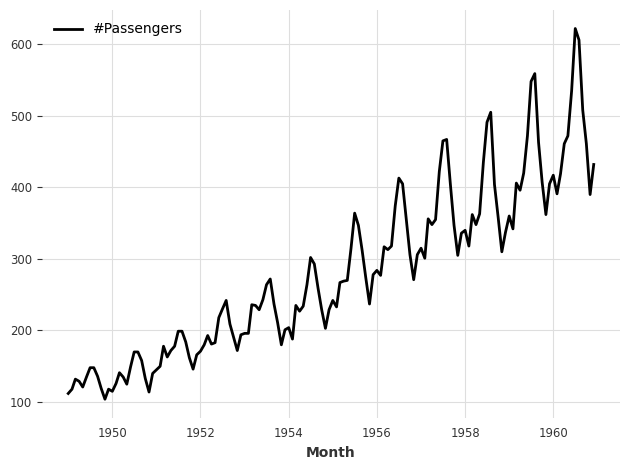

In [22]:
series = dataset.load()
series.plot()

<Axes: xlabel='Month'>

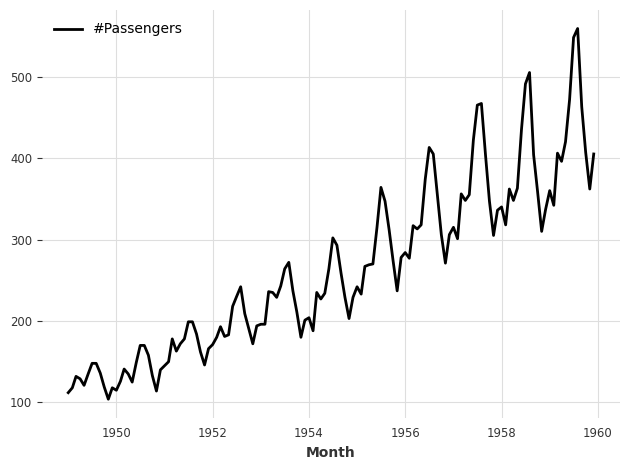

In [ ]:
series_train, series_test = series.split_before(pd.Timestamp('1960'))

series_train.plot()